# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading data
We will load the titanic dataset obtained from kaggle using pandas library. 

In [2]:
data=pd.read_csv("train.csv")

Let us take a look at the first five rows to observe the features available and its entries. 

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Evaluating Missing Data

In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


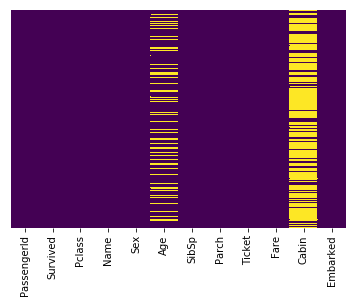

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

It looks like age column has few NaN values and it can be imputed based on statistical methods. But as the NaN values in Cabin column is very high and it should be removed. 

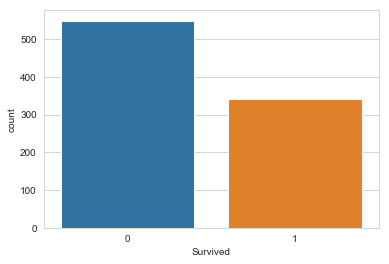

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data)

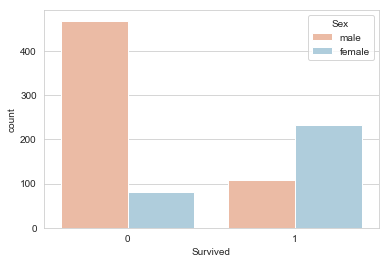

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=data, palette='RdBu')

Men are always pity. Look most of them who survived were women.. 

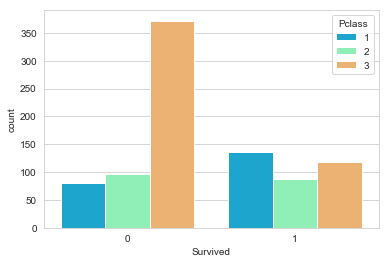

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=data, palette='rainbow')

We can find that most of the poor people died. Also more nuber of rich people have survived. 

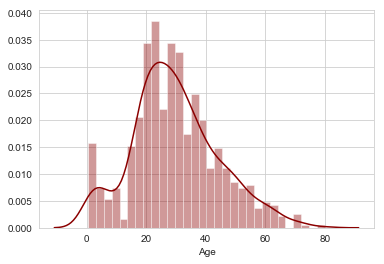

In [9]:
sns.distplot(data['Age'].dropna(), kde=True,color='darkred', bins=30)

We can find that more number of people aged between 20 and 30 are there on board.

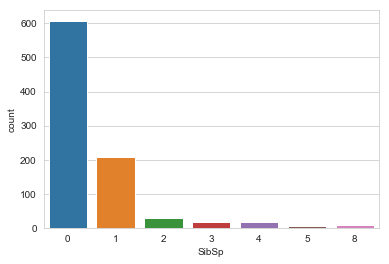

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp', data=data)

So we can understand that most number of people actually travelled alone on this wonderful ship.

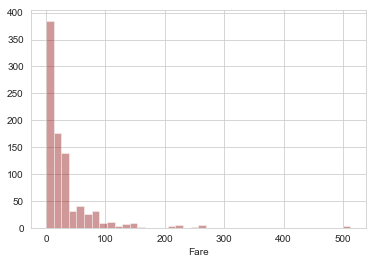

In [11]:
sns.distplot(data['Fare'].dropna(), kde=False,color='darkred', bins=40)

Therefore, it is evident that more number of people travelled with less fare. 

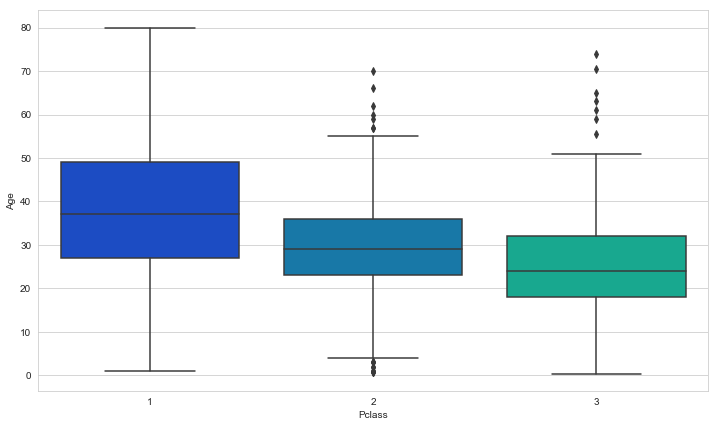

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

We can find that the mean value of age varies for different passenger class. So let us replace the NaN values of age with mean of age across each class.

In [13]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [14]:
data['Age']=data[['Age', 'Pclass']].apply(impute_age, axis=1)

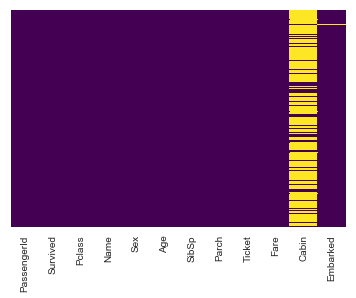

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
data.drop('Cabin', inplace=True, axis=1)

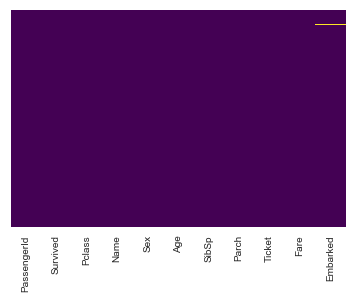

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Here sex and Embarked are useful categorical variables. We cannot use them unless cobverted to numerical data. So let us first convert it into numerical data. 

In [19]:
embark=pd.get_dummies(data['Embarked'], drop_first=True)

In [20]:
sex=pd.get_dummies(data['Sex'], drop_first=True)

Now let us add those new dataframe to our dataset. 

In [21]:
data=pd.concat([data, sex, embark], axis=1)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Now let us remove the unnecessary variable which does not provide so much value to us. 

In [23]:
data=data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


Now the data is ready for modelling phase. Let us use logistic regression for creating a baseline model

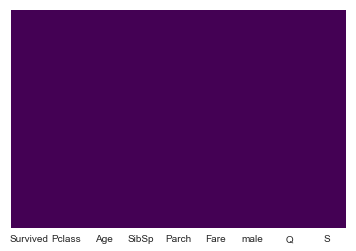

In [25]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.3, random_state=24)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression()

In [30]:
model.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
predicted=model.predict(X_test)

In [32]:
predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy=confusion_matrix(y_test, predicted)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_1=accuracy_score(y_test, predicted)

In [39]:
accuracy_1

0.8171641791044776

In [1]:
!jt -t solarizedl